# Dados

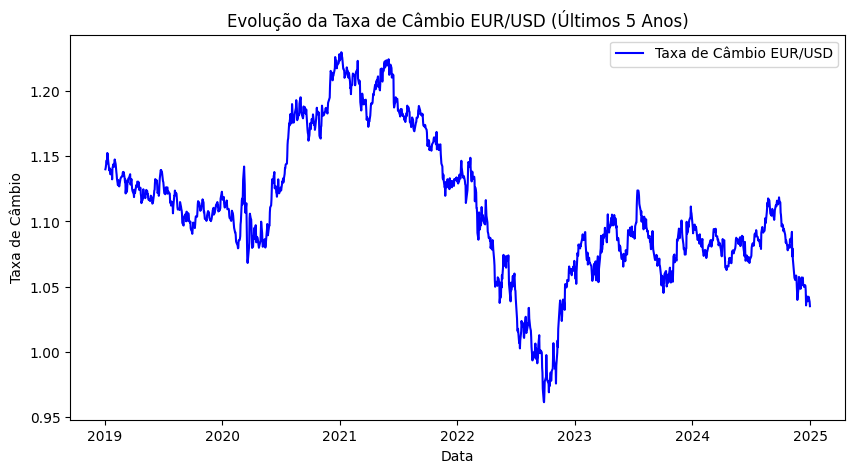

In [12]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def obter_taxa_cambio(inicio, fim, simbolo="DEXUSEU", fonte="fred"):
    """
    Função para obter dados históricos da taxa de câmbio a partir de uma API pública.

    Parâmetros:
    - inicio (datetime): Data inicial para coleta dos dados.
    - fim (datetime): Data final para coleta dos dados.
    - simbolo (str): Símbolo do par de moedas (padrão: "DEXUSEU" para EUR/USD).
    - fonte (str): Fonte dos dados (padrão: "fred" - Federal Reserve Economic Data).

    Retorna:
    - df (DataFrame): DataFrame com a taxa de câmbio e o valor do dia anterior.
    """
    df = web.DataReader(simbolo, fonte, inicio, fim)
    df.dropna(inplace=True)  # Remover valores nulos

    # Criando a variável "Prev_Day" (valor do dia anterior)
    df["Prev_Day"] = df[simbolo].shift(1)
    df.dropna(inplace=True)  # Remover a primeira linha (contém NaN)

    return df

# ---------------------------
# 1) COLETAR DADOS DOS ÚLTIMOS 5 ANOS
# ---------------------------
inicio = datetime.datetime(2019, 1, 1)
fim = datetime.datetime(2024, 12, 31)
df = obter_taxa_cambio(inicio, fim)

# ---------------------------
# 2) PLOTAR OS DADOS HISTÓRICOS
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["DEXUSEU"], label="Taxa de Câmbio EUR/USD", color="blue")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio")
plt.legend()
plt.title("Evolução da Taxa de Câmbio EUR/USD (Últimos 5 Anos)")
plt.show()


# Regressão Linear

Performace do modelo em Janeiro 2025 Data:
RMSE: 0.00549
R² Score: 0.55130


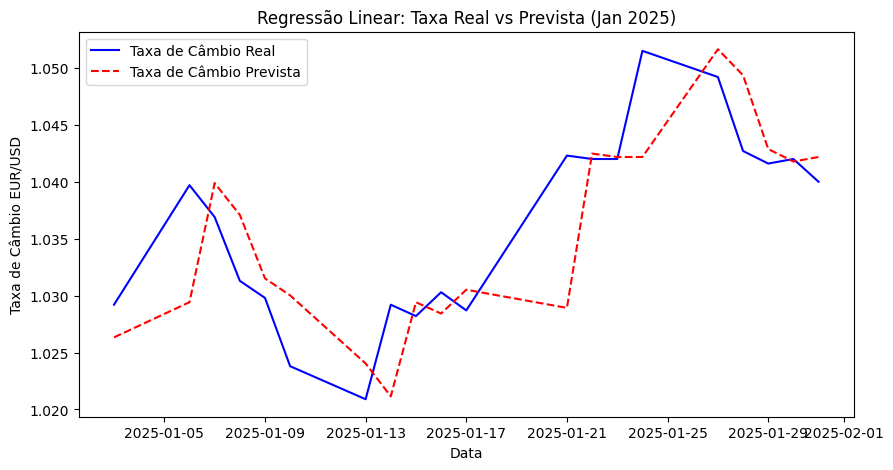

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

# Criar a variável de atraso
df_train["Prev_Day"] = df_train["DEXUSEU"].shift(1)
df_train.dropna(inplace=True)

# Separar features e target
X_train = df_train[["Prev_Day"]]
y_train = df_train["DEXUSEU"]

# ---------------------------
# 2) TREINAR O MODELO COM OS DADOS ATÉ 2024
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)  

# ---------------------------
# 3) CARREGAR OS DADOS REAIS DE JANEIRO DE 2025 (TESTE)
# ---------------------------
start_test_2025 = datetime.datetime(2025, 1, 1)
end_test_2025 = datetime.datetime(2025, 1, 31)

df_test_2025 = web.DataReader("DEXUSEU", "fred", start_test_2025, end_test_2025)
df_test_2025.dropna(inplace=True)

# Criar a variável de atraso (Prev_Day)
df_test_2025["Prev_Day"] = df_test_2025["DEXUSEU"].shift(1)
df_test_2025.dropna(inplace=True)

X_test_2025 = df_test_2025[["Prev_Day"]]
y_test_2025 = df_test_2025["DEXUSEU"]

# ---------------------------
# 4) FAZER A PREVISÃO NO CONJUNTO DE TESTE
# ---------------------------
y_pred_2025 = model.predict(X_test_2025)

# ---------------------------
# 5) AVALIAR O MODELO COM OS DADOS REAIS DE JANEIRO DE 2025
# ---------------------------
rmse_2025 = np.sqrt(mean_squared_error(y_test_2025, y_pred_2025))
r2_2025 = r2_score(y_test_2025, y_pred_2025)

print(f"Performace do modelo em Janeiro 2025 Data:\nRMSE: {rmse_2025:.5f}\nR² Score: {r2_2025:.5f}")

# ---------------------------
# 6) PLOTAR RESULTADOS
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test_2025.index, y_test_2025, label="Taxa de Câmbio Real", color="blue")
plt.plot(y_test_2025.index, y_pred_2025, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("Regressão Linear: Taxa Real vs Prevista (Jan 2025)")
plt.show()


# Gradient Boosting 

Desempenho do modelo Gradient Boosting em Janeiro de 2025:
RMSE: 0.00603
R²: 0.45959


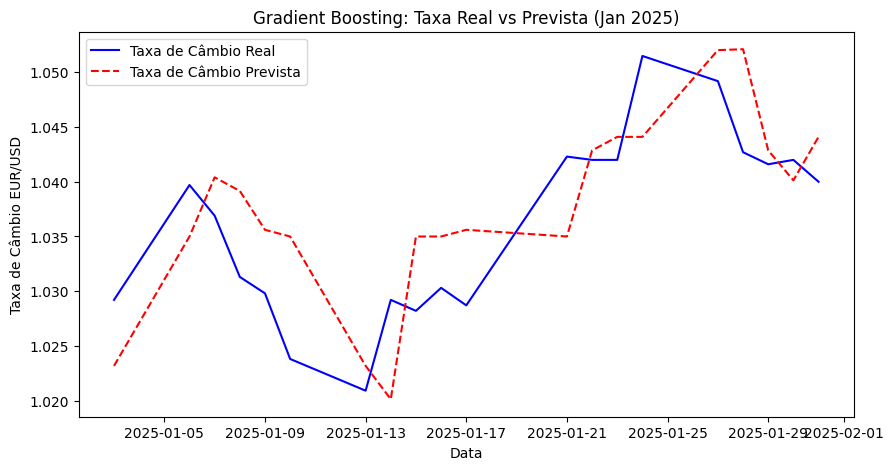

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

# Criar a variável de atraso
df_train["Prev_Day"] = df_train["DEXUSEU"].shift(1)
df_train.dropna(inplace=True)

# Separar features e target
X_train = df_train[["Prev_Day"]]
y_train = df_train["DEXUSEU"]

# ---------------------------
# 2) TREINAR O MODELO COM OS DADOS ATÉ 2024
# ---------------------------
model = GradientBoostingRegressor()
model.fit(X_train, y_train)  

# ---------------------------
# 3) CARREGAR OS DADOS REAIS DE JANEIRO DE 2025 (TESTE)
# ---------------------------
start_test_2025 = datetime.datetime(2025, 1, 1)
end_test_2025 = datetime.datetime(2025, 1, 31)

df_test_2025 = web.DataReader("DEXUSEU", "fred", start_test_2025, end_test_2025)
df_test_2025.dropna(inplace=True)

# Criar a variável de atraso (Prev_Day)
df_test_2025["Prev_Day"] = df_test_2025["DEXUSEU"].shift(1)
df_test_2025.dropna(inplace=True)

X_test_2025 = df_test_2025[["Prev_Day"]]
y_test_2025 = df_test_2025["DEXUSEU"]

# ---------------------------
# 4) FAZER A PREVISÃO NO CONJUNTO DE TESTE
# ---------------------------
y_pred_2025 = model.predict(X_test_2025)

# ---------------------------
# 5) AVALIAR O MODELO COM OS DADOS REAIS DE JANEIRO DE 2025
# ---------------------------
rmse_2025 = np.sqrt(mean_squared_error(y_test_2025, y_pred_2025))
r2_2025 = r2_score(y_test_2025, y_pred_2025)

print(f"Desempenho do modelo Gradient Boosting em Janeiro de 2025:\nRMSE: {rmse_2025:.5f}\nR²: {r2_2025:.5f}")

# ---------------------------
# 6) PLOTAR RESULTADOS
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test_2025.index, y_test_2025, label="Taxa de Câmbio Real", color="blue")
plt.plot(y_test_2025.index, y_pred_2025, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("Gradient Boosting: Taxa Real vs Prevista (Jan 2025)")
plt.show()


# Rede Neural Artificial (ANN)

Desempenho do modelo ANN em Janeiro de 2025:
RMSE: 0.00569
R²: 0.51918


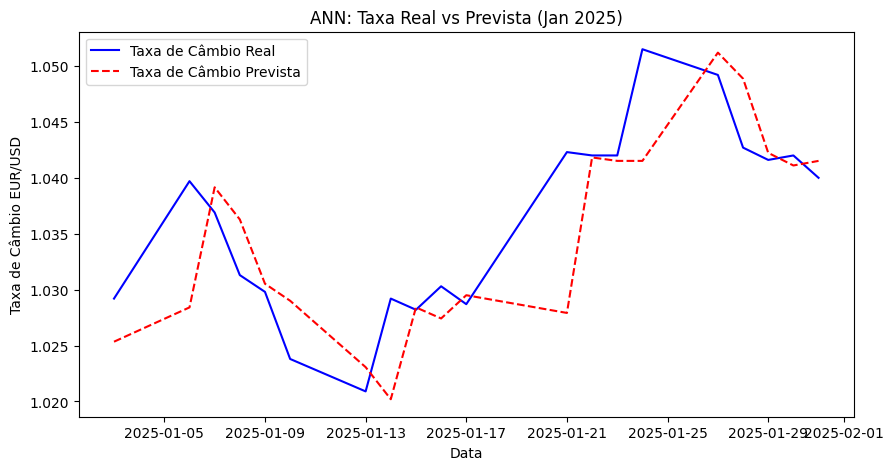

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

df_train["Prev_Day"] = df_train["DEXUSEU"].shift(1)
df_train.dropna(inplace=True)

X_train = df_train[["Prev_Day"]]
y_train = df_train["DEXUSEU"]

# Normalização
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# ---------------------------
# 2) TREINAR O MODELO ANN
# ---------------------------
model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_scaled)

# ---------------------------
# 3) CARREGAR OS DADOS DE TESTE DE JANEIRO DE 2025
# ---------------------------
start_test_2025 = datetime.datetime(2025, 1, 1)
end_test_2025 = datetime.datetime(2025, 1, 31)

df_test_2025 = web.DataReader("DEXUSEU", "fred", start_test_2025, end_test_2025)
df_test_2025.dropna(inplace=True)

df_test_2025["Prev_Day"] = df_test_2025["DEXUSEU"].shift(1)
df_test_2025.dropna(inplace=True)

X_test_2025 = df_test_2025[["Prev_Day"]]
y_test_2025 = df_test_2025["DEXUSEU"]

X_test_scaled = scaler_X.transform(X_test_2025)
y_test_scaled = scaler_y.transform(y_test_2025.values.reshape(-1, 1)).ravel()

# ---------------------------
# 4) FAZER PREVISÃO E REVERTER ESCALA
# ---------------------------
y_pred_scaled = model.predict(X_test_scaled)
y_pred_2025 = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# ---------------------------
# 5) AVALIAR O MODELO
# ---------------------------
rmse_2025 = np.sqrt(mean_squared_error(y_test_2025, y_pred_2025))
r2_2025 = r2_score(y_test_2025, y_pred_2025)

print(f"Desempenho do modelo ANN em Janeiro de 2025:\nRMSE: {rmse_2025:.5f}\nR²: {r2_2025:.5f}")

# ---------------------------
# 6) PLOTAR RESULTADOS
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test_2025.index, y_test_2025, label="Taxa de Câmbio Real", color="blue")
plt.plot(y_test_2025.index, y_pred_2025, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("ANN: Taxa Real vs Prevista (Jan 2025)")
plt.show()


# LSTM

Epoch 1/20


C:\Users\Pichau\anaconda3\envs\forex_usd\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1578
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7035e-04
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7452e-04
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3328e-04
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8029e-04
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2446e-04
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5037e-04
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8462e-04
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8669e-04
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9805e-04
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8305e-04
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8751e-04
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

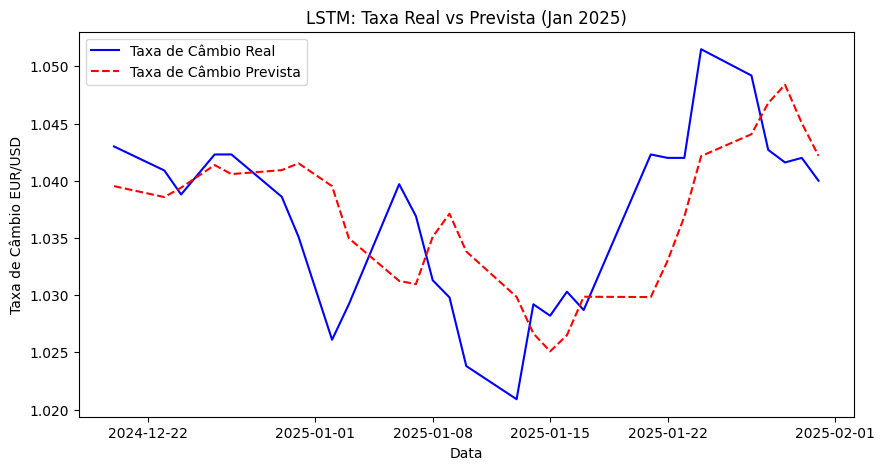

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

# ---------------------------
# 2) PRÉ-PROCESSAMENTO PARA LSTM
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(df_train.values)

# Função para criar as janelas temporais (lookback)
def create_dataset(dataset, look_back=3):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i - look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 3
X_train, y_train = create_dataset(scaled_train, look_back)

# Ajustar dimensões para LSTM: [amostras, passos de tempo, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# ---------------------------
# 3) DEFINIR E TREINAR O MODELO LSTM
# ---------------------------
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# ---------------------------
# 4) CARREGAR DADOS DE JANEIRO DE 2025
# ---------------------------
start_test = datetime.datetime(2024, 12, 20)  # pegar um pouco antes para garantir janela de lookback
end_test = datetime.datetime(2025, 1, 31)

df_test = web.DataReader("DEXUSEU", "fred", start_test, end_test)
df_test.dropna(inplace=True)

# Concatenar com o final do treino para ter continuidade
df_total = pd.concat((df_train, df_test), axis=0)
inputs = df_total[len(df_total) - len(df_test) - look_back:].values
inputs_scaled = scaler.transform(inputs)

# Criar X_test
X_test = []
for i in range(look_back, len(inputs_scaled)):
    X_test.append(inputs_scaled[i - look_back:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ---------------------------
# 5) FAZER PREVISÕES
# ---------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Valores reais para comparar
real_values = df_test["DEXUSEU"].values[-len(y_pred):]

# ---------------------------
# 6) AVALIAR O DESEMPENHO
# ---------------------------
rmse = np.sqrt(mean_squared_error(real_values, y_pred))
r2 = r2_score(real_values, y_pred)

print(f"Desempenho do modelo LSTM em Janeiro de 2025:\nRMSE: {rmse:.5f}\nR²: {r2:.5f}")

# ---------------------------
# 7) PLOTAR RESULTADOS
# ---------------------------
# Garantir que o eixo X tenha o mesmo tamanho de y_pred
dates = df_test.index[-len(y_pred):]

# Plotar
plt.figure(figsize=(10, 5))
plt.plot(dates, real_values, label="Taxa de Câmbio Real", color="blue")
plt.plot(dates, y_pred, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("LSTM: Taxa Real vs Prevista (Jan 2025)")
plt.show()



# Random Forest

Desempenho do modelo Random Forest em Janeiro de 2025:
RMSE: 0.00810
R²: 0.02418


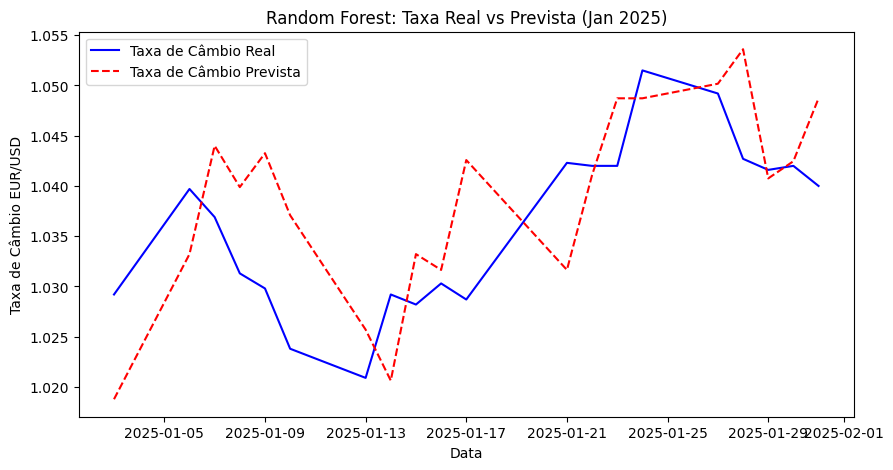

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

# Criar variável de atraso (lag)
df_train["Prev_Day"] = df_train["DEXUSEU"].shift(1)
df_train.dropna(inplace=True)

X_train = df_train[["Prev_Day"]]
y_train = df_train["DEXUSEU"]

# ---------------------------
# 2) TREINAR O MODELO COM RANDOM FOREST
# ---------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 3) CARREGAR DADOS DE TESTE DE JANEIRO DE 2025
# ---------------------------
start_test = datetime.datetime(2025, 1, 1)
end_test = datetime.datetime(2025, 1, 31)

df_test = web.DataReader("DEXUSEU", "fred", start_test, end_test)
df_test.dropna(inplace=True)

df_test["Prev_Day"] = df_test["DEXUSEU"].shift(1)
df_test.dropna(inplace=True)

X_test = df_test[["Prev_Day"]]
y_test = df_test["DEXUSEU"]

# ---------------------------
# 4) PREVISÃO
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# 5) AVALIAÇÃO
# ---------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Desempenho do modelo Random Forest em Janeiro de 2025:\nRMSE: {rmse:.5f}\nR²: {r2:.5f}")

# ---------------------------
# 6) GRÁFICO
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Taxa de Câmbio Real", color="blue")
plt.plot(y_test.index, y_pred, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("Random Forest: Taxa Real vs Prevista (Jan 2025)")
plt.show()


# Arvores de Decisão

Desempenho do modelo Árvore de Decisão em Janeiro de 2025:
RMSE: 0.00990
R²: -0.45576


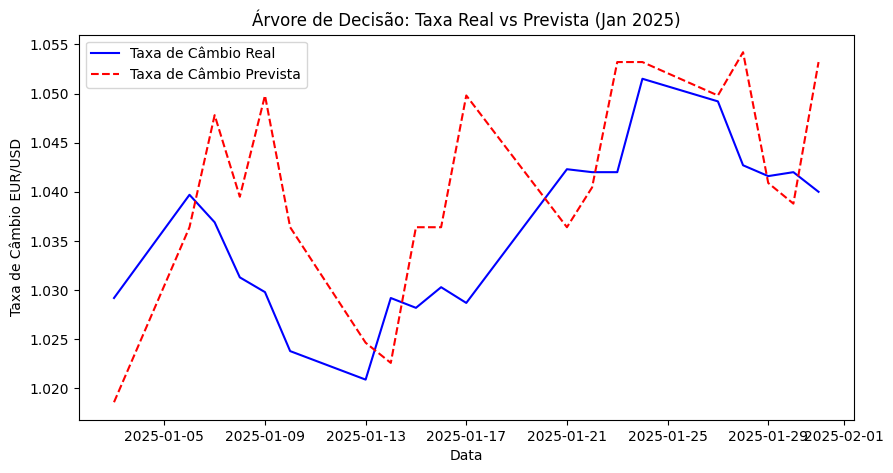

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# 1) CARREGAR OS DADOS HISTÓRICOS (TREINAMENTO ATÉ 2024)
# ---------------------------
start_train = datetime.datetime(2019, 1, 1)
end_train = datetime.datetime(2024, 12, 31)

df_train = web.DataReader("DEXUSEU", "fred", start_train, end_train)
df_train.dropna(inplace=True)

# Criar variável de atraso (lag)
df_train["Prev_Day"] = df_train["DEXUSEU"].shift(1)
df_train.dropna(inplace=True)

X_train = df_train[["Prev_Day"]]
y_train = df_train["DEXUSEU"]

# ---------------------------
# 2) TREINAR O MODELO COM ÁRVORE DE DECISÃO
# ---------------------------
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 3) CARREGAR DADOS DE TESTE DE JANEIRO DE 2025
# ---------------------------
start_test = datetime.datetime(2025, 1, 1)
end_test = datetime.datetime(2025, 1, 31)

df_test = web.DataReader("DEXUSEU", "fred", start_test, end_test)
df_test.dropna(inplace=True)

df_test["Prev_Day"] = df_test["DEXUSEU"].shift(1)
df_test.dropna(inplace=True)

X_test = df_test[["Prev_Day"]]
y_test = df_test["DEXUSEU"]

# ---------------------------
# 4) PREVISÃO
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# 5) AVALIAÇÃO
# ---------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Desempenho do modelo Árvore de Decisão em Janeiro de 2025:\nRMSE: {rmse:.5f}\nR²: {r2:.5f}")

# ---------------------------
# 6) GRÁFICO
# ---------------------------
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Taxa de Câmbio Real", color="blue")
plt.plot(y_test.index, y_pred, label="Taxa de Câmbio Prevista", color="red", linestyle="dashed")
plt.xlabel("Data")
plt.ylabel("Taxa de Câmbio EUR/USD")
plt.legend()
plt.title("Árvore de Decisão: Taxa Real vs Prevista (Jan 2025)")
plt.show()
